In [3]:
#step1-regular devide
import numpy as np

file=open('./step3-regular-CPA-to-latitudes.txt','r')
line=file.readline()

time_Y=[]
time_M=[]
time_YM=[]

value=[]
while line:
    time_Y.append(line.split()[0])
    time_M.append(line.split()[1])
    time_YM.append(line.split()[2])
    value.append(line.split()[-1])
    line=file.readline()

time_Y=np.array(time_Y)
time_M=np.array(time_M)
time_YM=np.array(time_YM)

value=np.array(value)

 #find the months
file_new=open('./step4-1-regular-Month-1devide-Latitude.txt','w')
just=[]
for i in range(len(time_YM)):
    
    if i in just:
        continue
    just.append(i)
    value_add=[]
    value_add.append(value[i])
    for j in range(len(time_YM)):
        if i != j:
            if time_YM[i] == time_YM[j]:
                value_add.append(value[j])
                just.append(j)
    if len(value_add) == 1:
        file_new.write(str(time_Y[i]).center(6)+" "+str(time_M[i]).center(4)+" "+str(time_YM[i]).center(10)+' '+str(len(value_add)).center(6)+' '+value_add[0]+'\n')
    if len(value_add) > 1:
        string=value_add[0]
        for g in range(1,len(value_add)):
            string = string + ' '+ value_add[g]
        file_new.write(str(time_Y[i]).center(6)+" "+str(time_M[i]).center(4)+" "+str(time_YM[i]).center(10)+' '+str(len(value_add)).center(6)+' '+string+'\n')
    #print('{:.3f} %'.format(i/len(time_Y)*100.))
                

In [5]:
#step2-regular-count
import numpy as np

file_new1=open('./step4-2-regular-Month-2count-Latitude-NHSH6090.txt','w')
file_new2=open('./step4-2-regular-Month-2count-Latitude-NLSL1040.txt','w')

file=open('./step4-1-regular-Month-1devide-Latitude.txt','r')
line=file.readline()
print(len(line))

while line:
    NH6090=0
    SH6090=0
    NHSH6090 = 0

    NL1040=0
    SL1040=0
    NLSL1040 = 0

    value=[]
    
    timeY=line.split()[0]
    timeM=line.split()[1]
    timeYM=line.split()[2]
    
    for i in range(4, len(line.split())):
        value.append(float(line.split()[i]))
        sum_n=len(value)
    #print(timeYM, sum_n)
    for j in range(len(value)):
        if 60.0 <= value[j]<= 90.0:
            NH6090=NH6090+1
            NHSH6090=NHSH6090+1
        if -90.0 <= value[j]<= -60.0:
            SH6090=SH6090+1
            NHSH6090=NHSH6090+1
        if 10.0 <= value[j] <=40.0:
            NL1040 = NL1040+1
            NLSL1040 =  NLSL1040+1
        if -40.0 <= value[j] <= -10.0 :
            SL1040 =  SL1040+1
            NLSL1040 =  NLSL1040+1

    file_new1.write(str(timeY).center(6)+str(timeM).center(4)+str(timeYM).center(10)+str(len(value)).center(6)+str(NH6090).center(6)+str(SH6090).center(6)+str(NHSH6090).center(6)+"\n")
    file_new2.write(str(timeY).center(6)+str(timeM).center(4)+str(timeYM).center(10)+str(len(value)).center(6)+str(NL1040).center(6)+str(SL1040).center(6)+str(NLSL1040).center(6)+"\n")
    line=file.readline()

45


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


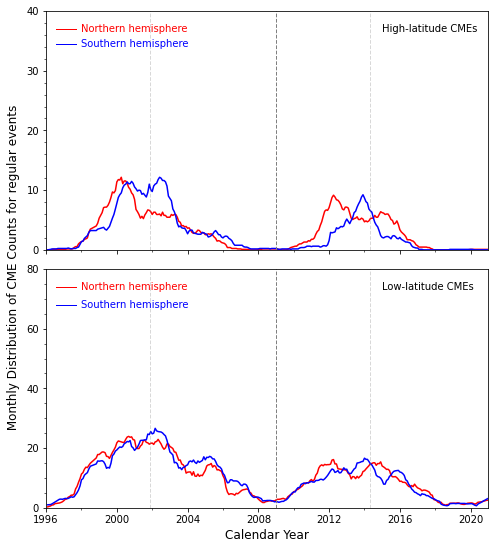

In [7]:
#step3-regular-plot
from cProfile import label
import matplotlib.pyplot as plt
import pylab
from matplotlib import *
from mpl_toolkits.axes_grid1 import host_subplot#lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
#from astroML.plotting import setup_text_plots
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter
time6090 = [float(l.split()[2]) for l in open("step4-2-regular-Month-2count-Latitude-NHSH6090.txt")]
NH6090 = [float(l.split()[4]) for l in open("step4-2-regular-Month-2count-Latitude-NHSH6090.txt")]
SH6090 = [float(l.split()[5]) for l in open("step4-2-regular-Month-2count-Latitude-NHSH6090.txt")]

time1040 = [float(l.split()[2]) for l in open("step4-2-regular-Month-2count-Latitude-NLSL1040.txt")]
NL1040 = [float(l.split()[4]) for l in open("step4-2-regular-Month-2count-Latitude-NLSL1040.txt")]
SL1040 = [float(l.split()[5]) for l in open("step4-2-regular-Month-2count-Latitude-NLSL1040.txt")]

#SLS1040 = [float(l.split()[-1]) for l in open("step4-Month-2count-smooth-NLSL1040.txt")]

NH6090 = savgol_filter(NH6090,13, 1, mode='nearest')
SH6090 = savgol_filter(SH6090,13, 1, mode='nearest')
NL1040 = savgol_filter(NL1040,13, 1, mode='nearest')
SL1040 = savgol_filter(SL1040,13, 1, mode='nearest')

fig = plt.figure(figsize =(6.9,7.5))
plt.subplots_adjust(left=0.09, bottom=0.06, right=0.98, top=0.98, wspace=0.10, hspace=0.08)
ax1 = host_subplot(211)
#ax1.set_ylabel('Whole disk')
ax1.plot(time6090,NH6090,"r",lw=1.5, linestyle="-",label="NH6090")
ax1.plot(time6090,SH6090,"b",lw=1.5, linestyle="-",label="SH6090")
ax1.set_ylim([0.0,40])
ax1.set_xlim([1996.0,2021.0])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.setp(ax1.get_xticklabels(), visible=False)
#ax1.plot([0.0,2022.0],[5.0,5.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax1.plot([0.0,2022.0],[15.0,15.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax1.plot([0.0,2022.0],[25.0,25.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#marker label

ax1.plot([1996.55,1997.70],[37.0,37.0],"r",lw=1.0, linestyle="-",label="NH6090")
ax1.plot([1996.55,1997.70],[34.5,34.5],"b",lw=1.0, linestyle="-",label="SH6090")
ax1.text(1998.00,37.0,"Northern hemisphere",color = "red",fontsize=10.0,va='center',rotation=0.0)
ax1.text(1998.00,34.5,"Southern hemisphere",color = "blue",fontsize=10.0,va='center',rotation=0.0)
ax1.plot([2009.0,2009.0],[0.0,40.0],"gray",lw=1.0,linestyle="dashed")
ax1.plot([2001.90,2001.90],[0.,8000.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax1.plot([2014.333,2014.333],[0.0,100.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax1.text(2015.0, 37.0, "High-latitude CMEs ", fontsize=10, va='center')
#ax1.grid(alpha=0.5,linestyle=":")

ax2 = host_subplot(212)
#ax2.set_ylabel('Northern hemisphere')
ax2.plot(time6090,NL1040,"r",lw=1.5, linestyle="-",label="NL1040")
ax2.plot(time6090,SL1040,"b",lw=1.5, linestyle="-",label="SL1040")
ax2.set_xlabel('Calendar Year',fontsize=12)
ax2.text(1993.8,80.0, " Monthly Distribution of CME Counts for regular events", fontsize=12.0, va='center', rotation=90)
ax2.set_ylim([0.0,80])
ax2.set_xlim([1996,2021.0])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))
#ax2.plot([0.0,2022.0],[10.0,10.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.plot([0.0,2022.0],[30.0,30.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.plot([0.0,2022.0],[50.0,50.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.grid(alpha=0.5,linestyle=":")
#marker label

ax2.plot([1996.55,1997.70],[74.0,74.0],"r",lw=1.0, linestyle="-")
ax2.plot([1996.55,1997.70],[68.0,68.0],"b",lw=1.0, linestyle="-")
ax2.text(1998.00,74.0,"Northern hemisphere",color = "red",fontsize=10.0,va='center',rotation=0.0)
ax2.text(1998.00,68.0,"Southern hemisphere",color = "blue",fontsize=10.0,va='center',rotation=0.0)
ax2.text(2015.0, 74.0, "Low-latitude CMEs", fontsize=10, va='center')
ax2.plot([2009.0,2009.0],[0.0,80.0],"gray",lw=1.0,linestyle="dashed")
ax2.plot([2001.90,2001.90],[0.,8000.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax2.plot([2014.333,2014.333],[0.0,100.0],"gray",alpha=0.3,lw=1.0,linestyle="--")

foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('step4-3-regular-Month-Figure1.eps', format='eps', dpi=1000)
foo_fig.savefig('step4-3-regular-Month-Figure1.png', format='png', dpi=1000)

plt.show()

In [9]:
#step1-specific devide
import numpy as np

file=open('./step3-specific-CPA-to-latitudes.txt','r')
line=file.readline()

time_Y=[]
time_M=[]
time_YM=[]

value=[]
while line:
    time_Y.append(line.split()[0])
    time_M.append(line.split()[1])
    time_YM.append(line.split()[2])
    value.append(line.split()[-1])
    line=file.readline()

time_Y=np.array(time_Y)
time_M=np.array(time_M)
time_YM=np.array(time_YM)

value=np.array(value)

 #find the months
file_new=open('./step4-1-specific-Month-1devide-Latitude.txt','w')
just=[]
for i in range(len(time_YM)):
    
    if i in just:
        continue
    just.append(i)
    value_add=[]
    value_add.append(value[i])
    for j in range(len(time_YM)):
        if i != j:
            if time_YM[i] == time_YM[j]:
                value_add.append(value[j])
                just.append(j)
    if len(value_add) == 1:
        file_new.write(str(time_Y[i]).center(6)+" "+str(time_M[i]).center(4)+" "+str(time_YM[i]).center(10)+' '+str(len(value_add)).center(6)+' '+value_add[0]+'\n')
    if len(value_add) > 1:
        string=value_add[0]
        for g in range(1,len(value_add)):
            string = string + ' '+ value_add[g]
        file_new.write(str(time_Y[i]).center(6)+" "+str(time_M[i]).center(4)+" "+str(time_YM[i]).center(10)+' '+str(len(value_add)).center(6)+' '+string+'\n')
    #print('{:.3f} %'.format(i/len(time_Y)*100.))
                

In [11]:
#step2-specific-count
import numpy as np

file_new1=open('./step4-2-specific-Month-2count-Latitude-NHSH6090.txt','w')
file_new2=open('./step4-2-specific-Month-2count-Latitude-NLSL1040.txt','w')

file=open('./step4-1-specific-Month-1devide-Latitude.txt','r')
line=file.readline()
print(len(line))

while line:
    NH6090=0
    SH6090=0
    NHSH6090 = 0

    NL1040=0
    SL1040=0
    NLSL1040 = 0

    value=[]
    
    timeY=line.split()[0]
    timeM=line.split()[1]
    timeYM=line.split()[2]
    
    for i in range(4, len(line.split())):
        value.append(float(line.split()[i]))
        sum_n=len(value)
    #print(timeYM, sum_n)
    for j in range(len(value)):
        if 60.0 <= value[j]<= 90.0:
            NH6090=NH6090+1
            NHSH6090=NHSH6090+1
        if -90.0 <= value[j]<= -60.0:
            SH6090=SH6090+1
            NHSH6090=NHSH6090+1
        if 10.0 <= value[j] <=40.0:
            NL1040 = NL1040+1
            NLSL1040 =  NLSL1040+1
        if -40.0 <= value[j] <= -10.0 :
            SL1040 =  SL1040+1
            NLSL1040 =  NLSL1040+1

    file_new1.write(str(timeY).center(6)+str(timeM).center(4)+str(timeYM).center(10)+str(len(value)).center(6)+str(NH6090).center(6)+str(SH6090).center(6)+str(NHSH6090).center(6)+"\n")
    file_new2.write(str(timeY).center(6)+str(timeM).center(4)+str(timeYM).center(10)+str(len(value)).center(6)+str(NL1040).center(6)+str(SL1040).center(6)+str(NLSL1040).center(6)+"\n")
    line=file.readline()

44


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


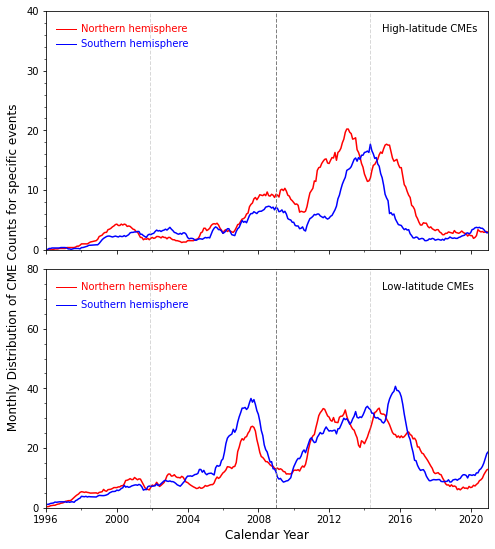

In [13]:
#step3-specific-plot
from cProfile import label
import matplotlib.pyplot as plt
import pylab
from matplotlib import *
from mpl_toolkits.axes_grid1 import host_subplot#lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
#from astroML.plotting import setup_text_plots
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter
time6090 = [float(l.split()[2]) for l in open("step4-2-specific-Month-2count-Latitude-NHSH6090.txt")]
NH6090 = [float(l.split()[4]) for l in open("step4-2-specific-Month-2count-Latitude-NHSH6090.txt")]
SH6090 = [float(l.split()[5]) for l in open("step4-2-specific-Month-2count-Latitude-NHSH6090.txt")]

time1040 = [float(l.split()[2]) for l in open("step4-2-specific-Month-2count-Latitude-NLSL1040.txt")]
NL1040 = [float(l.split()[4]) for l in open("step4-2-specific-Month-2count-Latitude-NLSL1040.txt")]
SL1040 = [float(l.split()[5]) for l in open("step4-2-specific-Month-2count-Latitude-NLSL1040.txt")]

#SLS1040 = [float(l.split()[-1]) for l in open("step4-Month-2count-smooth-NLSL1040.txt")]

NH6090 = savgol_filter(NH6090,13, 1, mode='nearest')
SH6090 = savgol_filter(SH6090,13, 1, mode='nearest')
NL1040 = savgol_filter(NL1040,13, 1, mode='nearest')
SL1040 = savgol_filter(SL1040,13, 1, mode='nearest')

fig = plt.figure(figsize =(6.9,7.5))
plt.subplots_adjust(left=0.09, bottom=0.06, right=0.98, top=0.98, wspace=0.10, hspace=0.08)
ax1 = host_subplot(211)
#ax1.set_ylabel('Whole disk')
ax1.plot(time6090,NH6090,"r",lw=1.5, linestyle="-",label="NH6090")
ax1.plot(time6090,SH6090,"b",lw=1.5, linestyle="-",label="SH6090")
ax1.set_ylim([0.0,40])
ax1.set_xlim([1996.0,2021.0])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.setp(ax1.get_xticklabels(), visible=False)
#ax1.plot([0.0,2022.0],[5.0,5.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax1.plot([0.0,2022.0],[15.0,15.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax1.plot([0.0,2022.0],[25.0,25.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#marker label

ax1.plot([1996.55,1997.70],[37.0,37.0],"r",lw=1.0, linestyle="-",label="NH6090")
ax1.plot([1996.55,1997.70],[34.5,34.5],"b",lw=1.0, linestyle="-",label="SH6090")
ax1.text(1998.00,37.0,"Northern hemisphere",color = "red",fontsize=10.0,va='center',rotation=0.0)
ax1.text(1998.00,34.5,"Southern hemisphere",color = "blue",fontsize=10.0,va='center',rotation=0.0)
ax1.plot([2009.0,2009.0],[0.0,40.0],"gray",lw=1.0,linestyle="dashed")
ax1.plot([2001.90,2001.90],[0.,8000.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax1.plot([2014.333,2014.333],[0.0,100.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax1.text(2015.0, 37.0, "High-latitude CMEs ", fontsize=10, va='center')
#ax1.grid(alpha=0.5,linestyle=":")

ax2 = host_subplot(212)
#ax2.set_ylabel('Northern hemisphere')
ax2.plot(time6090,NL1040,"r",lw=1.5, linestyle="-",label="NL1040")
ax2.plot(time6090,SL1040,"b",lw=1.5, linestyle="-",label="SL1040")
ax2.set_xlabel('Calendar Year',fontsize=12)
ax2.text(1993.8,80.0, " Monthly Distribution of CME Counts for specific events", fontsize=12.0, va='center', rotation=90)
ax2.set_ylim([0.0,80])
ax2.set_xlim([1996,2021.0])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))
#ax2.plot([0.0,2022.0],[10.0,10.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.plot([0.0,2022.0],[30.0,30.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.plot([0.0,2022.0],[50.0,50.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.grid(alpha=0.5,linestyle=":")
#marker label

ax2.plot([1996.55,1997.70],[74.0,74.0],"r",lw=1.0, linestyle="-")
ax2.plot([1996.55,1997.70],[68.0,68.0],"b",lw=1.0, linestyle="-")
ax2.text(1998.00,74.0,"Northern hemisphere",color = "red",fontsize=10.0,va='center',rotation=0.0)
ax2.text(1998.00,68.0,"Southern hemisphere",color = "blue",fontsize=10.0,va='center',rotation=0.0)
ax2.text(2015.0, 74.0, "Low-latitude CMEs", fontsize=10, va='center')
ax2.plot([2009.0,2009.0],[0.0,80.0],"gray",lw=1.0,linestyle="dashed")
ax2.plot([2001.90,2001.90],[0.,8000.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax2.plot([2014.333,2014.333],[0.0,100.0],"gray",alpha=0.3,lw=1.0,linestyle="--")

foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('step4-3-specific-Month-Figure1.eps', format='eps', dpi=1000)
foo_fig.savefig('step4-3-specific-Month-Figure1.png', format='png', dpi=1000)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


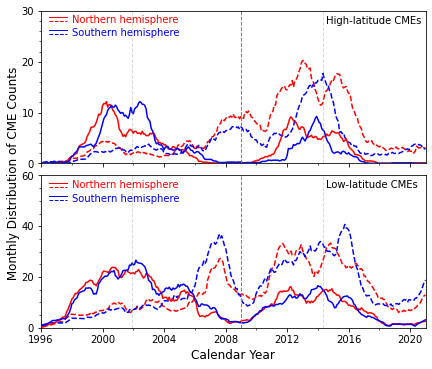

In [2]:
#regular0specific-Figure6
from cProfile import label
import matplotlib.pyplot as plt
import pylab
from matplotlib import *
from mpl_toolkits.axes_grid1 import host_subplot#lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
#from astroML.plotting import setup_text_plots
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter
time6090pv = [float(l.split()[2]) for l in open("step4-2-specific-Month-2count-Latitude-NHSH6090.txt")]
NH6090pv = [float(l.split()[4]) for l in open("step4-2-specific-Month-2count-Latitude-NHSH6090.txt")]
SH6090pv = [float(l.split()[5]) for l in open("step4-2-specific-Month-2count-Latitude-NHSH6090.txt")]
time1040pv = [float(l.split()[2]) for l in open("step4-2-specific-Month-2count-Latitude-NLSL1040.txt")]
NL1040pv = [float(l.split()[4]) for l in open("step4-2-specific-Month-2count-Latitude-NLSL1040.txt")]
SL1040pv = [float(l.split()[5]) for l in open("step4-2-specific-Month-2count-Latitude-NLSL1040.txt")]

time6090expv = [float(l.split()[2]) for l in open("step4-2-regular-Month-2count-Latitude-NHSH6090.txt")]
NH6090expv = [float(l.split()[4]) for l in open("step4-2-regular-Month-2count-Latitude-NHSH6090.txt")]
SH6090expv = [float(l.split()[5]) for l in open("step4-2-regular-Month-2count-Latitude-NHSH6090.txt")]

time1040expv = [float(l.split()[2]) for l in open("step4-2-regular-Month-2count-Latitude-NLSL1040.txt")]
NL1040expv = [float(l.split()[4]) for l in open("step4-2-regular-Month-2count-Latitude-NLSL1040.txt")]
SL1040expv = [float(l.split()[5]) for l in open("step4-2-regular-Month-2count-Latitude-NLSL1040.txt")]
#SLS1040 = [float(l.split()[-1]) for l in open("step4-Month-2count-smooth-NLSL1040.txt")]

NH6090pv = savgol_filter(NH6090pv,13, 1, mode='nearest')
SH6090pv = savgol_filter(SH6090pv,13, 1, mode='nearest')
NL1040pv = savgol_filter(NL1040pv,13, 1, mode='nearest')
SL1040pv = savgol_filter(SL1040pv,13, 1, mode='nearest')

NH6090expv = savgol_filter(NH6090expv,13, 1, mode='nearest')
SH6090expv = savgol_filter(SH6090expv,13, 1, mode='nearest')
NL1040expv = savgol_filter(NL1040expv,13, 1, mode='nearest')
SL1040expv = savgol_filter(SL1040expv,13, 1, mode='nearest')

fig = plt.figure(figsize =(6.0,5.0))
plt.subplots_adjust(left=0.09, bottom=0.10, right=0.98, top=0.98, wspace=0.10, hspace=0.08)
ax1 = host_subplot(211)
#ax1.set_ylabel('Whole disk')
ax1.plot(time6090pv,NH6090pv,"r",lw=1.5, linestyle="--",label="NH6090pv")
ax1.plot(time6090pv,SH6090pv,"b",lw=1.5, linestyle="--",label="SH6090pv")
ax1.plot(time6090expv,NH6090expv,"r",lw=1.5, linestyle="-",label="NH6090expv")
ax1.plot(time6090expv,SH6090expv,"b",lw=1.5, linestyle="-",label="SH6090expv")
ax1.set_ylim([0.0,30])
ax1.set_xlim([1996.0,2021.0])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.setp(ax1.get_xticklabels(), visible=False)
#ax1.plot([0.0,2022.0],[5.0,5.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax1.plot([0.0,2022.0],[15.0,15.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax1.plot([0.0,2022.0],[25.0,25.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#marker label

ax1.plot([1996.55,1997.70],[28.8,28.8],"r",lw=1.0, linestyle="-",label="NH6090")
ax1.plot([1996.55,1997.70],[28.0,28.0],"r",lw=1.0, linestyle="--",label="NH6090")
ax1.plot([1996.55,1997.70],[26.2,26.2],"b",lw=1.0, linestyle="-",label="SH6090")
ax1.plot([1996.55,1997.70],[25.5,25.5],"b",lw=1.0, linestyle="--",label="SH6090")
ax1.text(1998.00,28.3,"Northern hemisphere",color = "red",fontsize=10.0,va='center',rotation=0.0)
ax1.text(1998.00,25.8,"Southern hemisphere",color = "blue",fontsize=10.0,va='center',rotation=0.0)
ax1.plot([2009.0,2009.0],[0.0,40.0],"gray",lw=1.0,linestyle="dashed")
ax1.plot([2001.90,2001.90],[0.,8000.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax1.plot([2014.333,2014.333],[0.0,100.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax1.text(2014.5, 28.0, "High-latitude CMEs ", fontsize=10, va='center')
#ax1.grid(alpha=0.5,linestyle=":")

ax2 = host_subplot(212)
#ax2.set_ylabel('Northern hemisphere')
ax2.plot(time1040pv,NL1040pv,"r",lw=1.5, linestyle="--",label="NL1040pv")
ax2.plot(time1040pv,SL1040pv,"b",lw=1.5, linestyle="--",label="SL1040pv")
ax2.plot(time1040expv,NL1040expv,"r",lw=1.5, linestyle="-",label="NL1040expv")
ax2.plot(time1040expv,SL1040expv,"b",lw=1.5, linestyle="-",label="SL1040expv")
ax2.set_xlabel('Calendar Year',fontsize=12)
ax2.text(1993.8,60.0, " Monthly Distribution of CME Counts", fontsize=12.0, va='center', rotation=90)
ax2.set_ylim([0.0,60])
ax2.set_xlim([1996,2021.0])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))
#ax2.plot([0.0,2022.0],[10.0,10.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.plot([0.0,2022.0],[30.0,30.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.plot([0.0,2022.0],[50.0,50.0],"grey",alpha=0.15,lw=1.0,linestyle=":")
#ax2.grid(alpha=0.5,linestyle=":")
#marker label

ax2.plot([1996.55,1997.70],[57.0,57.0],"r",lw=1.0, linestyle="-")
ax2.plot([1996.55,1997.70],[55.5,55.5],"r",lw=1.0, linestyle="--")
ax2.plot([1996.55,1997.70],[52.0,52.0],"b",lw=1.0, linestyle="-")
ax2.plot([1996.55,1997.70],[50.5,50.5],"b",lw=1.0, linestyle="--")
ax2.text(1998.00,56.2,"Northern hemisphere",color = "red",fontsize=10.0,va='center',rotation=0.0)
ax2.text(1998.00,51.0,"Southern hemisphere",color = "blue",fontsize=10.0,va='center',rotation=0.0)
ax2.text(2014.5, 56.3, "Low-latitude CMEs", fontsize=10, va='center')
ax2.plot([2009.0,2009.0],[0.0,80.0],"gray",lw=1.0,linestyle="dashed")
ax2.plot([2001.90,2001.90],[0.,8000.0],"gray",alpha=0.3,lw=1.0,linestyle="--")
ax2.plot([2014.333,2014.333],[0.0,100.0],"gray",alpha=0.3,lw=1.0,linestyle="--")

foo_fig = plt.gcf() # 'get current figure'
foo_fig.savefig('z-Figure1-regular-specific.eps', format='eps', dpi=1000)
foo_fig.savefig('z-Figure1-regular-specific.png', format='png', dpi=1000)

plt.show()